## Canadian Monthly Retail Sales

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df = pd.read_csv('../data/cansim-0800020-eng-6674700030567901031.csv',
                 skiprows=6, skipfooter=9,
                 engine='python')
df.head()

,Adjustments,Unadjusted,Seasonally adjusted
0,Jan-1991,12588862,15026890
1,Feb-1991,12154321,15304585
2,Mar-1991,14337072,15413591
3,Apr-1991,15108570,15293409
4,May-1991,17225734,15676083


In [3]:
df = df.set_index(pd.to_datetime(df.Adjustments))
df = df.drop('Adjustments',axis = 1)
df.head()

,Unadjusted,Seasonally adjusted
Adjustments,,
1991-01-01,12588862,15026890
1991-02-01,12154321,15304585
1991-03-01,14337072,15413591
1991-04-01,15108570,15293409
1991-05-01,17225734,15676083


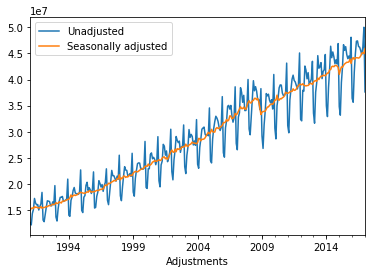

In [4]:
df.plot()

In [5]:
split_date = pd.to_datetime('01-01-2011')

In [6]:
train = df.loc[:split_date,['Unadjusted']]
test = df.loc[split_date:,['Unadjusted']]

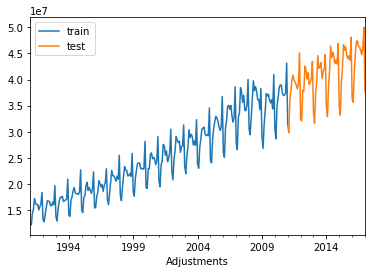

In [7]:
ax = train.plot()
test.plot(ax=ax)
plt.legend(['train','test'])

In [8]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

train_scaled = scaler.fit_transform(train)
test_scaled = scaler.transform(test)

In [9]:
X_train = train_scaled[:-1]
y_train = train_scaled[1:]

X_test = test_scaled[:-1]
y_test = test_scaled[1:]

### Fully Connected

In [10]:
from keras.models import Sequential
from keras.layers import Dense
import keras.backend as K
from keras.callbacks import EarlyStopping
from keras.optimizers import Adam

Using TensorFlow backend.


In [11]:
K.clear_session()

model = Sequential()
model.add(Dense(16, input_dim=1, activation='relu'))
model.add(Dense(1))
model.compile(Adam(lr=0.01),loss='mean_squared_error')
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 16)                32        
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 17        
Total params: 49
Trainable params: 49
Non-trainable params: 0
_________________________________________________________________


In [12]:
early_stop = EarlyStopping(monitor='loss', patience=10, verbose=1)

In [13]:
model.fit(X_train, y_train, epochs=200,
          batch_size=2, verbose=1,
          validation_split=0.1,
          callbacks=[early_stop])

Train on 216 samples, validate on 24 samples
Epoch 1/200
216/216 [==============================] - 2s 7ms/step - loss: 0.0225 - val_loss: 0.0185
Epoch 2/200
216/216 [==============================] - 0s 1ms/step - loss: 0.0102 - val_loss: 0.0199
Epoch 3/200
216/216 [==============================] - 0s 1ms/step - loss: 0.0108 - val_loss: 0.0166
Epoch 4/200
216/216 [==============================] - 0s 1ms/step - loss: 0.0111 - val_loss: 0.0190
Epoch 5/200
216/216 [==============================] - 0s 1ms/step - loss: 0.0113 - val_loss: 0.0198
Epoch 6/200
216/216 [==============================] - 0s 1ms/step - loss: 0.0105 - val_loss: 0.0166
Epoch 7/200
216/216 [==============================] - 0s 1ms/step - loss: 0.0110 - val_loss: 0.0329
Epoch 8/200
216/216 [==============================] - 0s 1ms/step - loss: 0.0108 - val_loss: 0.0302
Epoch 9/200
216/216 [==============================] - 0s 1ms/step - loss: 0.0110 - val_loss: 0.0152
Epoch 10/200
216/216 [========================

In [14]:
y_pred = model.predict(X_test)

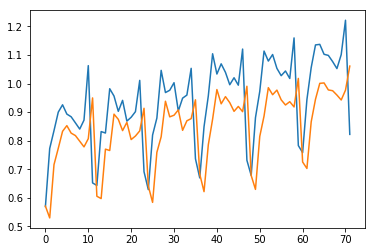

In [15]:
plt.plot(y_test)
plt.plot(y_pred)

In [16]:
print("MAPE: " + str(np.mean(np.abs(y_test-y_pred)/y_test)*100) + "%")

MAPE: 13.9784658047%


## Recurrent Predictor

In [17]:
from keras.layers import LSTM, GRU

In [18]:
X_train.shape

(240, 1)

In [19]:
#3d tensor with shape (batch_size, timesteps, input_dim)
X_train[:,None].shape

(240, 1, 1)

In [20]:
X_train_t = X_train[:,None]
X_test_t = X_test[:,None]

In [21]:
K.clear_session()
model = Sequential()
model.add(LSTM(6, input_shape = (1,1)))
model.add(Dense(1))
model.compile(Adam(lr=0.01),loss = 'mse')

In [22]:
model.fit(X_train_t, y_train,
        epochs = 100, 
        batch_size = 1, 
        verbose = 1,
        validation_split=0.1,
        callbacks = [early_stop])

Train on 216 samples, validate on 24 samples
Epoch 1/100
216/216 [==============================] - 2s 8ms/step - loss: 0.0230 - val_loss: 0.0159
Epoch 2/100
216/216 [==============================] - 1s 5ms/step - loss: 0.0112 - val_loss: 0.0199
Epoch 3/100
216/216 [==============================] - 1s 5ms/step - loss: 0.0105 - val_loss: 0.0244
Epoch 4/100
216/216 [==============================] - 1s 5ms/step - loss: 0.0106 - val_loss: 0.0170
Epoch 5/100
216/216 [==============================] - 1s 5ms/step - loss: 0.0108 - val_loss: 0.0150
Epoch 6/100
216/216 [==============================] - 1s 5ms/step - loss: 0.0105 - val_loss: 0.0197
Epoch 7/100
216/216 [==============================] - 1s 5ms/step - loss: 0.0104 - val_loss: 0.0226
Epoch 8/100
216/216 [==============================] - 1s 5ms/step - loss: 0.0113 - val_loss: 0.0211
Epoch 9/100
216/216 [==============================] - 1s 4ms/step - loss: 0.0102 - val_loss: 0.0201
Epoch 10/100
216/216 [========================

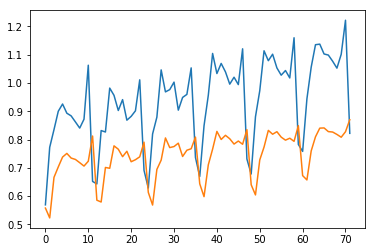

In [23]:
y_pred = model.predict(X_test_t)
plt.plot(y_test)
plt.plot(y_pred)

In [24]:
print("MAPE: " + str(np.mean(np.abs(y_test-y_pred)/y_test)*100) + "%")

MAPE: 21.065816544%


### Windows

In [25]:
train_scaled.shape

(241, 1)

In [26]:
train_sc_df = pd.DataFrame(train_scaled, columns = ['Scaled'], index = train.index)
test_sc_df = pd.DataFrame(test_scaled, columns = ['Scaled'], index = test.index)
train_sc_df.head()


,Scaled
Adjustments,
1991-01-01,0.014020
1991-02-01,0.000000
1991-03-01,0.070426
1991-04-01,0.095318
1991-05-01,0.163628


In [27]:
lags = 25
for s in range(1,lags):
    train_sc_df['shift_{}'.format(s)] = train_sc_df['Scaled'].shift(s)
    test_sc_df['shift_{}'.format(s)] = test_sc_df['Scaled'].shift(s)
    

In [28]:
train_sc_df.head(lags)

,Scaled,shift_1,shift_2,shift_3,shift_4,shift_5,shift_6,shift_7,shift_8,shift_9,...,shift_15,shift_16,shift_17,shift_18,shift_19,shift_20,shift_21,shift_22,shift_23,shift_24
Adjustments,,,,,,,,,,,,,,,,,,,,,
1991-01-01,0.014020,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1991-02-01,0.000000,0.014020,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1991-03-01,0.070426,0.000000,0.014020,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1991-04-01,0.095318,0.070426,0.000000,0.014020,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1991-05-01,0.163628,0.095318,0.070426,0.000000,0.014020,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1991-06-01,0.135141,0.163628,0.095318,0.070426,0.000000,0.014020,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1991-07-01,0.123958,0.135141,0.163628,0.095318,0.070426,0.000000,0.014020,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1991-08-01,0.126174,0.123958,0.135141,0.163628,0.095318,0.070426,0.000000,0.014020,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1991-09-01,0.092309,0.126174,0.123958,0.135141,0.163628,0.095318,0.070426,0.000000,0.014020,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [29]:
X_train = train_sc_df.dropna().drop('Scaled', axis = 1)
y_train = train_sc_df.dropna()[['Scaled']]

X_test = test_sc_df.dropna().drop('Scaled', axis = 1)
y_test = test_sc_df.dropna()[['Scaled']]

In [30]:
X_train.head()

,shift_1,shift_2,shift_3,shift_4,shift_5,shift_6,shift_7,shift_8,shift_9,shift_10,...,shift_15,shift_16,shift_17,shift_18,shift_19,shift_20,shift_21,shift_22,shift_23,shift_24
Adjustments,,,,,,,,,,,,,,,,,,,,,
1993-01-01,0.242908,0.124592,0.142221,0.118027,0.118984,0.144648,0.147189,0.149130,0.109831,0.065964,...,0.111395,0.092309,0.126174,0.123958,0.135141,0.163628,0.095318,0.070426,0.000000,0.014020
1993-02-01,0.048991,0.242908,0.124592,0.142221,0.118027,0.118984,0.144648,0.147189,0.149130,0.109831,...,0.131738,0.111395,0.092309,0.126174,0.123958,0.135141,0.163628,0.095318,0.070426,0.000000
1993-03-01,0.024083,0.048991,0.242908,0.124592,0.142221,0.118027,0.118984,0.144648,0.147189,0.149130,...,0.200913,0.131738,0.111395,0.092309,0.126174,0.123958,0.135141,0.163628,0.095318,0.070426
1993-04-01,0.098651,0.024083,0.048991,0.242908,0.124592,0.142221,0.118027,0.118984,0.144648,0.147189,...,0.030027,0.200913,0.131738,0.111395,0.092309,0.126174,0.123958,0.135141,0.163628,0.095318
1993-05-01,0.144802,0.098651,0.024083,0.048991,0.242908,0.124592,0.142221,0.118027,0.118984,0.144648,...,0.019993,0.030027,0.200913,0.131738,0.111395,0.092309,0.126174,0.123958,0.135141,0.163628


In [31]:
X_train = X_train.values
y_train = y_train.values

X_test = X_test.values
y_test = y_test.values

### Fully Connected on Windows

In [32]:
K.clear_session()

model = Sequential()
model.add(Dense(16,input_dim=lags-1,activation = 'relu'))
model.add(Dense(1))
model.compile(Adam(lr=0.001),loss = 'mse')
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 16)                400       
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 17        
Total params: 417
Trainable params: 417
Non-trainable params: 0
_________________________________________________________________


In [33]:
model.fit(X_train, y_train, epochs=200,
          batch_size=2, verbose=1,
          validation_split=0.1,
          callbacks=[early_stop])

Train on 195 samples, validate on 22 samples
Epoch 1/200
195/195 [==============================] - 0s 2ms/step - loss: 0.0645 - val_loss: 0.0100
Epoch 2/200
195/195 [==============================] - 0s 1ms/step - loss: 0.0057 - val_loss: 0.0076
Epoch 3/200
195/195 [==============================] - 0s 1ms/step - loss: 0.0043 - val_loss: 0.0057
Epoch 4/200
195/195 [==============================] - 0s 1ms/step - loss: 0.0033 - val_loss: 0.0067
Epoch 5/200
195/195 [==============================] - 0s 1ms/step - loss: 0.0026 - val_loss: 0.0052
Epoch 6/200
195/195 [==============================] - 0s 1ms/step - loss: 0.0023 - val_loss: 0.0115
Epoch 7/200
195/195 [==============================] - 0s 1ms/step - loss: 0.0021 - val_loss: 0.0163
Epoch 8/200
195/195 [==============================] - 0s 1ms/step - loss: 0.0016 - val_loss: 0.0116
Epoch 9/200
195/195 [==============================] - 0s 1ms/step - loss: 0.0013 - val_loss: 0.0137
Epoch 10/200
195/195 [========================

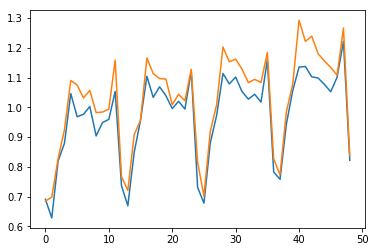

In [34]:
y_pred = model.predict(X_test)
plt.plot(y_test)
plt.plot(y_pred)

In [35]:
print("MAPE: " + str(np.mean(np.abs(y_test-y_pred)/y_test)*100) + "%")

MAPE: 5.3742216767%


### LSTM on Windows

In [36]:
X_train_t = X_train.reshape(X_train.shape[0],1,lags-1)
X_test_t = X_test.reshape(X_test.shape[0],1,lags-1)

In [37]:
X_train_t.shape

(217, 1, 24)

In [38]:
K.clear_session()
model = Sequential()
model.add(LSTM(20,input_shape = (1,lags-1)))
model.add(Dense(1))
model.compile(Adam(lr=0.001),loss = 'mse')

In [39]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_1 (LSTM)                (None, 20)                3600      
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 21        
Total params: 3,621
Trainable params: 3,621
Non-trainable params: 0
_________________________________________________________________


In [40]:
model.fit(X_train_t, y_train,
        epochs = 100, 
        batch_size = 1, 
        verbose = 1,
        validation_split=0.1,
        callbacks = [early_stop])

Train on 195 samples, validate on 22 samples
Epoch 1/100
195/195 [==============================] - 2s 8ms/step - loss: 0.0341 - val_loss: 0.0103
Epoch 2/100
195/195 [==============================] - 1s 5ms/step - loss: 0.0072 - val_loss: 0.0084
Epoch 3/100
195/195 [==============================] - 1s 5ms/step - loss: 0.0062 - val_loss: 0.0119
Epoch 4/100
195/195 [==============================] - 1s 5ms/step - loss: 0.0053 - val_loss: 0.0052
Epoch 5/100
195/195 [==============================] - 1s 5ms/step - loss: 0.0040 - val_loss: 0.0038
Epoch 6/100
195/195 [==============================] - 1s 5ms/step - loss: 0.0026 - val_loss: 0.0070
Epoch 7/100
195/195 [==============================] - 1s 5ms/step - loss: 0.0024 - val_loss: 0.0034
Epoch 8/100
195/195 [==============================] - 1s 5ms/step - loss: 0.0018 - val_loss: 0.0029
Epoch 9/100
195/195 [==============================] - 1s 4ms/step - loss: 0.0015 - val_loss: 0.0031
Epoch 10/100
195/195 [========================

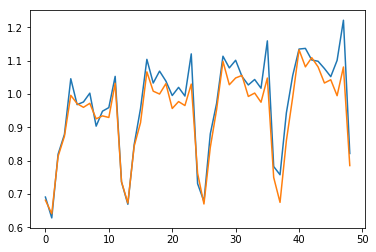

In [41]:
y_pred = model.predict(X_test_t)
plt.plot(y_test)
plt.plot(y_pred)

In [42]:
print("MAPE: " + str(np.mean(np.abs(y_test-y_pred)/y_test)*100) + "%")

MAPE: 3.52994394568%


### GRU

In [43]:
K.clear_session()
model = Sequential()
model.add(GRU(64,input_shape = (1,lags-1)))
model.add(Dense(1))
model.compile(Adam(lr=0.01),loss = 'mse')

In [44]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
gru_1 (GRU)                  (None, 64)                17088     
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 65        
Total params: 17,153
Trainable params: 17,153
Non-trainable params: 0
_________________________________________________________________


In [45]:
model.fit(X_train_t, y_train,
         epochs = 100, batch_size = 128, verbose = 1,validation_split=0.1)

Train on 195 samples, validate on 22 samples
Epoch 1/100
195/195 [==============================] - 1s 3ms/step - loss: 0.1115 - val_loss: 0.3141
Epoch 2/100
195/195 [==============================] - 0s 62us/step - loss: 0.1083 - val_loss: 0.0220
Epoch 3/100
195/195 [==============================] - 0s 72us/step - loss: 0.0166 - val_loss: 0.1319
Epoch 4/100
195/195 [==============================] - 0s 67us/step - loss: 0.0489 - val_loss: 0.0894
Epoch 5/100
195/195 [==============================] - 0s 72us/step - loss: 0.0263 - val_loss: 0.0095
Epoch 6/100
195/195 [==============================] - 0s 67us/step - loss: 0.0105 - val_loss: 0.0390
Epoch 7/100
195/195 [==============================] - 0s 67us/step - loss: 0.0239 - val_loss: 0.0231
Epoch 8/100
195/195 [==============================] - 0s 62us/step - loss: 0.0142 - val_loss: 0.0110
Epoch 9/100
195/195 [==============================] - 0s 62us/step - loss: 0.0074 - val_loss: 0.0356
Epoch 10/100
195/195 [================

195/195 [==============================] - 0s 67us/step - loss: 6.4395e-04 - val_loss: 0.0044
Epoch 80/100
195/195 [==============================] - 0s 57us/step - loss: 6.4089e-04 - val_loss: 0.0043
Epoch 81/100
195/195 [==============================] - 0s 62us/step - loss: 6.3592e-04 - val_loss: 0.0041
Epoch 82/100
195/195 [==============================] - 0s 62us/step - loss: 6.3839e-04 - val_loss: 0.0044
Epoch 83/100
195/195 [==============================] - 0s 62us/step - loss: 6.3376e-04 - val_loss: 0.0046
Epoch 84/100
195/195 [==============================] - 0s 67us/step - loss: 6.2724e-04 - val_loss: 0.0038
Epoch 85/100
195/195 [==============================] - 0s 67us/step - loss: 6.3436e-04 - val_loss: 0.0041
Epoch 86/100
195/195 [==============================] - 0s 62us/step - loss: 6.1644e-04 - val_loss: 0.0048
Epoch 87/100
195/195 [==============================] - 0s 62us/step - loss: 6.3327e-04 - val_loss: 0.0042
Epoch 88/100
195/195 [============================

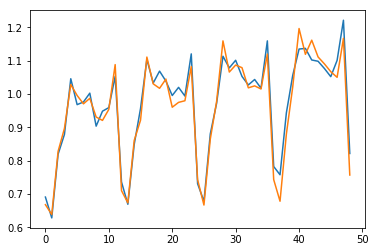

In [46]:
y_pred = model.predict(X_test_t)
plt.plot(y_test)
plt.plot(y_pred)

In [47]:
print("MAPE: " + str(np.mean(np.abs(y_test-y_pred)/y_test)*100) + "%")

MAPE: 2.70493166199%
